## Analisis Exploratorio Moocs

In [45]:
#Importamos librerias necesarias
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS

In [2]:
#cargamos los datasets
df_edx = pd.read_csv('datasets/edx_courses.csv')
df_udemy = pd.read_csv('datasets/udemy_courses.csv')
df_coursera = pd.read_csv('datasets/coursera_courses.csv')
df_reviews = pd.read_csv('datasets/coursera_reviews.csv')

Exploramos los Dataframe

## Analisis de EDX

In [3]:
df_edx.head(2)

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url
0,How to Learn Online,Learn essential strategies for successful onli...,"124,980",Self-paced on your time,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,Introductory,Education & Teacher Training,English,English,2–3 hours per week,2 Weeks,FREE-Add a Verified Certificate for $49 USD,"Designed for those who are new to elearning, t...",Welcome - We start with opportunities to meet ...,https://www.edx.org/course/how-to-learn-online
1,Programming for Everybody (Getting Started wit...,"This course is a ""no prerequisite"" introductio...","293,864",Self-paced on your time,The University of Michigan,Charles Severance,Introductory,Computer Science,English,English,2–4 hours per week,7 Weeks,FREE-Add a Verified Certificate for $49 USD,This course aims to teach everyone the basics ...,NaN,https://www.edx.org/course/programming-for-eve...


In [4]:
# Borramos algún duplicado
df_edx = df_edx.drop_duplicates()

In [5]:
#Eliminamos estas columnas no aporta valor al analisis de datos
df_edx.drop(['course_syllabus','instructors','course_url'], axis=1, inplace=True)

In [6]:
df_edx['summary'].fillna(df_edx['course_description'], inplace=True)
df_edx['subtitles'].fillna(df_edx['language'], inplace=True)
df_edx['course_description'].fillna(df_edx['summary'], inplace=True)
df_edx['n_enrolled'].fillna(0, inplace=True)
df_edx.dropna(subset=['summary'], inplace=True)

In [7]:
df_edx[df_edx['title'].duplicated(keep=False)].sort_values(by='title')

,title,summary,n_enrolled,course_type,institution,Level,subject,language,subtitles,course_effort,course_length,price,course_description
161,Introduction to Marketing,"Learn the fundamentals to marketing, including...","169,126",Self-paced on your time,University of British Columbia,Introductory,Business & Management,English,English,3–5 hours per week,6 Weeks,FREE-Add a Verified Certificate for $150 USD,Marketing is a crucial function in all busines...
561,Introduction to Marketing,An introduction to the role of marketing in a ...,0,Self-paced on your time,The University of Edinburgh,Introductory,Business & Management,English,English,2–3 hours per week,6 Weeks,FREE-Add a Verified Certificate for $149 USD,Do you want to learn how successful businesses...
159,Marketing Management,Learn how to effectively apply marketing manag...,"80,010",Self-paced on your time,Indian Institute of Management Bangalore,Intermediate,Business & Management,English,"English, हिन्दी",2–4 hours per week,9 Weeks,FREE-Add a Verified Certificate for $150 USD,According to world-renowned management consult...
388,Marketing Management,Learn key marketing strategies and tactics to ...,"43,415",Instructor-led on a course schedule,"The University of Maryland, College Park-Unive...",Advanced,Business & Management,English,English,8–10 hours per week,7 Weeks,FREE-Add a Verified Certificate for $214 USD,"Mark Cuban, owner of the Dallas Mavericks, put..."


In [8]:
# Eliminar comas de la columna 'n_enrolled'
df_edx['n_enrolled'] = df_edx['n_enrolled'].str.replace(',', '')

# Rellenar valores nulos con '0'
df_edx['n_enrolled'].fillna('0', inplace=True)

# Convertir la columna en tipo int64
df_edx['n_enrolled'] = df_edx['n_enrolled'].astype('int64')


Vemos el precio del dataframe Edx

In [9]:
# Devuelve un dataset que el precio no sea gratis
df_edx[df_edx['price'].apply(lambda x: not x.startswith('FREE'))]

,title,summary,n_enrolled,course_type,institution,Level,subject,language,subtitles,course_effort,course_length,price,course_description


In [10]:
df_edx['price'] = df_edx['price'].astype(str).apply(lambda x: float(x.split('$')[1].split()[0]) if len(x.split('$')) > 1 else None)
df_edx["price"]

0       49.0
1       49.0
2       90.0
3      199.0
4      249.0
       ...  
970     25.0
971    139.0
972    139.0
973     25.0
974     79.0
Name: price, Length: 948, dtype: float64

In [11]:
df_edx.head(2)

,title,summary,n_enrolled,course_type,institution,Level,subject,language,subtitles,course_effort,course_length,price,course_description
0,How to Learn Online,Learn essential strategies for successful onli...,124980,Self-paced on your time,edX,Introductory,Education & Teacher Training,English,English,2–3 hours per week,2 Weeks,49.0,"Designed for those who are new to elearning, t..."
1,Programming for Everybody (Getting Started wit...,"This course is a ""no prerequisite"" introductio...",293864,Self-paced on your time,The University of Michigan,Introductory,Computer Science,English,English,2–4 hours per week,7 Weeks,49.0,This course aims to teach everyone the basics ...


In [12]:
#Guardamos los cambios
df_edx.to_csv('Datasets/edx_final.csv',index=False)

## Analisis de UDEMY

In [13]:
##Checamos el dataframe
df_udemy.head(2)
df_udemy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


In [14]:
#Reviso valores duplicados
df_udemy[df_udemy['course_id'].duplicated(keep=False)].sort_values(by='course_id')

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
2478,28295,Learn Web Designing & HTML5/CSS3 Essentials in...,https://www.udemy.com/build-beautiful-html5-we...,True,75,43285,525,24,All Levels,4.000000,2013-01-03T00:55:31Z,Web Development
2561,28295,Learn Web Designing & HTML5/CSS3 Essentials in...,https://www.udemy.com/build-beautiful-html5-we...,True,75,43285,525,24,All Levels,4.000000,2013-01-03T00:55:31Z,Web Development
1234,185526,MicroStation - Células,https://www.udemy.com/microstation-celulas/,True,20,0,0,9,Beginner Level,0.616667,2014-04-15T21:48:55Z,Graphic Design
1473,185526,MicroStation - Células,https://www.udemy.com/microstation-celulas/,True,20,0,0,9,Beginner Level,0.616667,2014-04-15T21:48:55Z,Graphic Design
453,837322,Essentials of money value: Get a financial Life !,https://www.udemy.com/essentials-of-money-value/,True,20,0,0,20,All Levels,0.616667,2016-05-16T18:28:30Z,Business Finance
787,837322,Essentials of money value: Get a financial Life !,https://www.udemy.com/essentials-of-money-value/,True,20,0,0,20,All Levels,0.616667,2016-05-16T18:28:30Z,Business Finance
778,1035638,Understanding Financial Statements,https://www.udemy.com/understanding-financial-...,True,25,0,0,10,All Levels,1.000000,2016-12-15T14:56:17Z,Business Finance
894,1035638,Understanding Financial Statements,https://www.udemy.com/understanding-financial-...,True,25,0,0,10,All Levels,1.000000,2016-12-15T14:56:17Z,Business Finance
463,1084454,CFA Level 2- Quantitative Methods,https://www.udemy.com/cfa-level-2-quantitative...,True,40,0,0,35,All Levels,5.500000,2017-07-02T14:29:35Z,Business Finance
1100,1084454,CFA Level 2- Quantitative Methods,https://www.udemy.com/cfa-level-2-quantitative...,True,40,0,0,35,All Levels,5.500000,2017-07-02T14:29:35Z,Business Finance


In [15]:
#Elimino valores duplicados
df_udemy = df_udemy.drop_duplicates()
len(df_udemy)

3672

In [16]:
def fecha(df, columna):
    df[columna] = pd.to_datetime(df[columna])
    df[columna] = df[columna].dt.date

In [17]:
fecha(df_udemy, 'published_timestamp')

In [18]:
df_udemy = df_udemy.rename(columns={'published_timestamp': 'date_published'})

In [19]:
#Borramos url ya que no nos servira en el analisis
df_udemy.drop(['url'], axis=1, inplace=True)

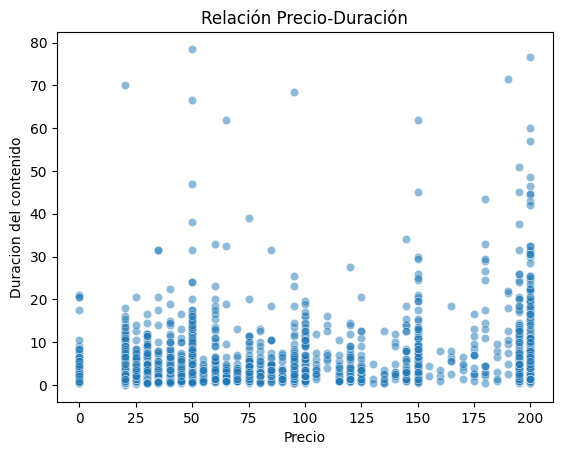

In [20]:
# Creo un scatter para relacionar Precio y Duración del contenido
sns.scatterplot(x=df_udemy['price'], y=df_udemy['content_duration'], alpha=0.5)

plt.xlabel('Precio')
plt.ylabel('Duracion del contenido')
plt.title('Relación Precio-Duración')

plt.show()

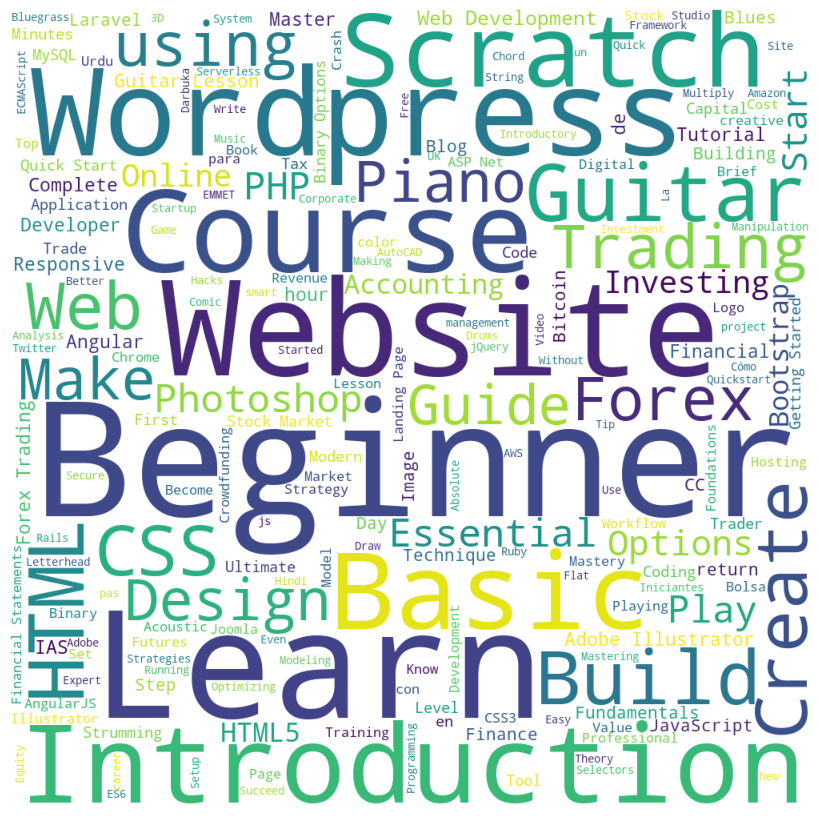

In [21]:
# Preparo el texto para un wordcloud de los títulos de los cursos gratuitos
text = df_udemy[df_udemy['is_paid'] == False].course_title.str.cat(sep=' ')

# Armo y presento el wordcloud
wordcloud = WordCloud(width=1000, height=1000, background_color="White",min_font_size=8).generate(text)

plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [22]:
#Guardamos los cambios
df_coursera.to_csv("Datasets\coursera_final.csv",index=False)

## Analisis de Coursera 

In [23]:
df_coursera.head(5)

,name,institution,course_url,course_id
0,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning
1,Indigenous Canada,University of Alberta,https://www.coursera.org/learn/indigenous-canada,indigenous-canada
2,The Science of Well-Being,Yale University,https://www.coursera.org/learn/the-science-of-...,the-science-of-well-being
3,Technical Support Fundamentals,Google,https://www.coursera.org/learn/technical-suppo...,technical-support-fundamentals
4,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...,google-cbrs-cpi-training


In [24]:
df_coursera.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         623 non-null    object
 1   institution  623 non-null    object
 2   course_url   623 non-null    object
 3   course_id    623 non-null    object
dtypes: object(4)
memory usage: 19.6+ KB


In [25]:
df_reviews.head(2)

,reviews,reviewers,date_reviews,rating,course_id
0,"Pretty dry, but I was able to pass with just t...",By Robert S,"Feb 12, 2020",4,google-cbrs-cpi-training
1,would be a better experience if the video and ...,By Gabriel E R,"Sep 28, 2020",4,google-cbrs-cpi-training


In [26]:
#Eliminamos Duplicados del dataframe reviews
df_reviews.drop_duplicates(inplace=True)
df_reviews

,reviews,reviewers,date_reviews,rating,course_id
0,"Pretty dry, but I was able to pass with just t...",By Robert S,"Feb 12, 2020",4,google-cbrs-cpi-training
1,would be a better experience if the video and ...,By Gabriel E R,"Sep 28, 2020",4,google-cbrs-cpi-training
2,Information was perfect! The program itself wa...,By Jacob D,"Apr 08, 2020",4,google-cbrs-cpi-training
3,A few grammatical mistakes on test made me do ...,By Dale B,"Feb 24, 2020",4,google-cbrs-cpi-training
4,Excellent course and the training provided was...,By Sean G,"Jun 18, 2020",4,google-cbrs-cpi-training
...,...,...,...,...,...
1454636,amazing,By FANISHA A A,"Oct 10, 2020",5,computer-networking
1454639,great,By Ilona Y Z,"Oct 07, 2020",5,computer-networking
1454642,Nice,By Aung T K,"Oct 10, 2020",5,computer-networking
1454643,Good,By Anthony N S,"Oct 08, 2020",5,computer-networking


In [27]:
#Eliminamos coursera url no sera util para el analisis
df_coursera.drop(['course_url'], axis=1, inplace=True)

In [28]:
# Agrupa por cada course_id único y le saca la media del rating
ratings = df_reviews.groupby('course_id')['rating'].mean()
ratings

course_id
aboriginal-education                                        4.552239
access-control-sscp                                         4.466667
accounting-analytics                                        4.395299
accounting-data-analytics-python                            3.500000
actualizacion-manejo-diabetes-tipo-2                        4.845850
                                                              ...   
womens-health-human-rights                                  4.884298
write-a-feature-length-screenplay-for-film-or-television    4.625000
write-your-first-novel                                      3.850000
writing-editing-words                                       4.742857
writing-for-business                                        4.818742
Name: rating, Length: 604, dtype: float64

In [29]:
reviews = df_reviews.groupby('course_id')['rating'].count()
reviews

course_id
aboriginal-education                                         67
access-control-sscp                                          45
accounting-analytics                                        468
accounting-data-analytics-python                              8
actualizacion-manejo-diabetes-tipo-2                        253
                                                           ... 
womens-health-human-rights                                  242
write-a-feature-length-screenplay-for-film-or-television     32
write-your-first-novel                                       20
writing-editing-words                                       105
writing-for-business                                        811
Name: rating, Length: 604, dtype: int64

In [30]:
#Creamos una funcion para lenguage
from langdetect import detect

def detectar(texto):
    try:
        lang = detect(texto)
        idiomas = {
            'en': 'English',
            'es': 'Spanish',
            'de': 'Deutsch',
            'fr': 'French',
            'it': 'Italian',
            'pt': 'Portuguese',
            'ar': 'Arabic',
            'zh': 'Chinese',
            'ja': 'Japanese',
            'ru': 'Russian'
        }
        return idiomas.get(lang, 'English')
    except:
        return 'Other'


In [31]:
df_coursera['language']=df_coursera['name'].apply(detectar)

In [32]:
df_coursera.head(5)

,name,institution,course_id,language
0,Machine Learning,Stanford University,machine-learning,English
1,Indigenous Canada,University of Alberta,indigenous-canada,English
2,The Science of Well-Being,Yale University,the-science-of-well-being,English
3,Technical Support Fundamentals,Google,technical-support-fundamentals,Deutsch
4,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,google-cbrs-cpi-training,English


In [33]:
#guardamos los cambios
df_coursera.to_csv('datasets\coursera_final.csv',index=False,sep='|')

<function matplotlib.pyplot.show(close=None, block=None)>

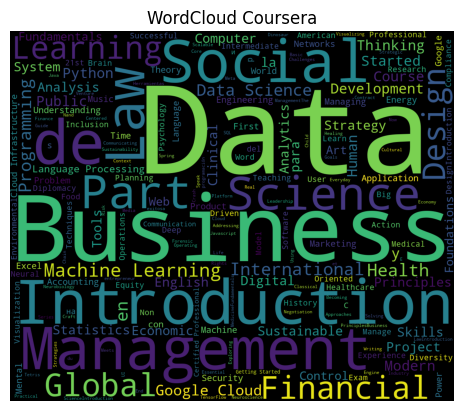

In [50]:
wordcloud = WordCloud(stopwords =STOPWORDS, width = 1200,height = 1000).generate("".join(df_coursera["name"]))
plt.imshow(wordcloud)
plt.title("WordCloud Coursera")
plt.axis("off")
plt.show

## Analisis de Coursera reviews

In [34]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 519947 entries, 0 to 1454644
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   reviews       519891 non-null  object
 1   reviewers     519947 non-null  object
 2   date_reviews  519947 non-null  object
 3   rating        519947 non-null  int64 
 4   course_id     519947 non-null  object
dtypes: int64(1), object(4)
memory usage: 23.8+ MB


In [35]:
#Los campos vacios del dataframe se llenara con este valor
df_reviews['reviews'].fillna('Sin dato', inplace=True)

In [36]:
#Creamos una funcion para caracteres especiales
import re

def remove_special_characters(text):
    pattern = r'[^a-zA-Z0-9\s]'
    cleaned_text = re.sub(pattern, '', text)
    return cleaned_text

df_reviews["reviews"] = df_reviews["reviews"].str.strip()
df_reviews["reviews"] = df_reviews["reviews"].apply(remove_special_characters)
df_reviews["reviews"] = df_reviews["reviews"].str.lower()


In [37]:
df_reviews['reviewers'].value_counts(ascending=False)

By Deleted A       1930
By Muhammad A       229
By Abhishek S       152
By Michael S        152
By David M          151
                   ... 
By Pooria P           1
By David J F          1
By Moises E T D       1
By Mike P M           1
By Kasirivu A K       1
Name: reviewers, Length: 287808, dtype: int64

In [38]:
#se crea una nueva columna llamada "concatenated_col" en el DataFrame 
df_reviews['concatenated_col'] = df_reviews['course_id'].astype(str) + ' ' + df_reviews['reviewers'] + ' ' + df_reviews['date_reviews'] + ' ' + df_reviews['reviews']
df_reviews.head(5)

,reviews,reviewers,date_reviews,rating,course_id,concatenated_col
0,pretty dry but i was able to pass with just tw...,By Robert S,"Feb 12, 2020",4,google-cbrs-cpi-training,"google-cbrs-cpi-training By Robert S Feb 12, 2..."
1,would be a better experience if the video and ...,By Gabriel E R,"Sep 28, 2020",4,google-cbrs-cpi-training,google-cbrs-cpi-training By Gabriel E R Sep 28...
2,information was perfect the program itself was...,By Jacob D,"Apr 08, 2020",4,google-cbrs-cpi-training,"google-cbrs-cpi-training By Jacob D Apr 08, 20..."
3,a few grammatical mistakes on test made me do ...,By Dale B,"Feb 24, 2020",4,google-cbrs-cpi-training,"google-cbrs-cpi-training By Dale B Feb 24, 202..."
4,excellent course and the training provided was...,By Sean G,"Jun 18, 2020",4,google-cbrs-cpi-training,"google-cbrs-cpi-training By Sean G Jun 18, 202..."


In [39]:
df_reviews[df_reviews['concatenated_col'].duplicated(keep=False)].sort_values(by='reviewers')

,reviews,reviewers,date_reviews,rating,course_id,concatenated_col
1328438,excellent,By PARTH P,"Jun 05, 2020",5,intro-chemistry,"intro-chemistry By PARTH P Jun 05, 2020 excellent"
1328440,excellent,By PARTH P,"Jun 05, 2020",5,intro-chemistry,"intro-chemistry By PARTH P Jun 05, 2020 excellent"


In [40]:
df_reviews.drop_duplicates(subset=["concatenated_col"], keep='first', inplace=True)

In [41]:
df_reviews.drop('concatenated_col', axis=1, inplace=True)

In [42]:
df_reviews['date_reviews'] = pd.to_datetime(df_reviews['date_reviews'])

In [44]:
#Guardamos los cambios
df_reviews.to_csv("Datasets\coursera_reviews_final.csv",index=False)